# Real Estate Investment Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import multiprocessing
%matplotlib inline

## Load data

In [2]:
data = pd.read_csv('C:/Users/LeTrongTinh/Desktop/data/user_to_1st_time_investor.csv')
data.head()

,guid,investor_status,distinct_days_visited_website,distinct_properties_viewed,time_on_properties,interactions_on_property_page,times_marketplace_filter_used,dashboard_interactions,time_on_howitworks,time_on_faqs,time_on_aboutus,time_on_team,time_on_homepage,time_on_marketplace,time_to_sign_up_from_first_visit_days,first_visit_to_first_investment_days
0,prod-549e3913-6a2f-4de8-91e3-10a5713abf19,investor,3,5,1175,17,0,0,68,25,117,0,195,605,0,86
1,prod-84f4f3d4-623a-4087-8c8c-924f503e40c3,investor,10,14,8738,16,0,0,131,640,0,536,620,3688,0,36
2,prod-354808e9-6c56-4ecc-acef-8fdac8685cd3,investor,4,7,771,5,0,0,567,0,0,129,93,45,0,29
3,prod-b03ffe67-d0d8-416a-94d0-5feff6f0430c,investor,5,4,178,2,0,0,202,0,0,0,44,55,0,0
4,prod-3af51e10-b3d3-4b8e-b89c-2f6b4b8130fb,investor,14,15,6614,40,0,0,46,1327,0,0,224,674,4,4


In [3]:
df = data.drop('guid', axis=1)
df.head()

,investor_status,distinct_days_visited_website,distinct_properties_viewed,time_on_properties,interactions_on_property_page,times_marketplace_filter_used,dashboard_interactions,time_on_howitworks,time_on_faqs,time_on_aboutus,time_on_team,time_on_homepage,time_on_marketplace,time_to_sign_up_from_first_visit_days,first_visit_to_first_investment_days
0,investor,3,5,1175,17,0,0,68,25,117,0,195,605,0,86
1,investor,10,14,8738,16,0,0,131,640,0,536,620,3688,0,36
2,investor,4,7,771,5,0,0,567,0,0,129,93,45,0,29
3,investor,5,4,178,2,0,0,202,0,0,0,44,55,0,0
4,investor,14,15,6614,40,0,0,46,1327,0,0,224,674,4,4


In [4]:
df.dtypes

investor_status                          object
distinct_days_visited_website             int64
distinct_properties_viewed                int64
time_on_properties                        int64
interactions_on_property_page             int64
times_marketplace_filter_used             int64
dashboard_interactions                    int64
time_on_howitworks                        int64
time_on_faqs                              int64
time_on_aboutus                           int64
time_on_team                              int64
time_on_homepage                          int64
time_on_marketplace                       int64
time_to_sign_up_from_first_visit_days    object
first_visit_to_first_investment_days     object
dtype: object

In [5]:
df.describe(include=['O'])

,investor_status,time_to_sign_up_from_first_visit_days,first_visit_to_first_investment_days
count,263501,263501,263501
unique,2,118,255
top,non-investor,-,-
freq,262142,251338,262142


In [6]:
df_null = (df[df['time_to_sign_up_from_first_visit_days'] == '-'])
df_null.head()

,investor_status,distinct_days_visited_website,distinct_properties_viewed,time_on_properties,interactions_on_property_page,times_marketplace_filter_used,dashboard_interactions,time_on_howitworks,time_on_faqs,time_on_aboutus,time_on_team,time_on_homepage,time_on_marketplace,time_to_sign_up_from_first_visit_days,first_visit_to_first_investment_days
12163,non-investor,1,0,0,0,0,0,97,0,0,0,0,0,-,-
12164,non-investor,1,1,72,0,0,0,0,0,0,0,0,0,-,-
12165,non-investor,1,0,0,0,0,0,0,0,0,0,0,0,-,-
12166,non-investor,3,1,0,0,0,0,0,0,0,0,0,0,-,-
12167,non-investor,1,0,0,0,0,0,0,0,0,0,0,0,-,-


In [7]:
df['time_to_sign_up_from_first_visit_days'] = pd.to_numeric(df['time_to_sign_up_from_first_visit_days'],errors='coerce')
df['time_to_sign_up_from_first_visit_days'] = df['time_to_sign_up_from_first_visit_days'].fillna(0).astype(float)
df['first_visit_to_first_investment_days'] = pd.to_numeric(df['time_to_sign_up_from_first_visit_days'],errors='coerce')
df['first_visit_to_first_investment_days'] = df['first_visit_to_first_investment_days'].fillna(0).astype(float)


In [8]:
df['investor_status'] = df['investor_status'].apply(lambda x: 1 if x=='investor' else 0)

In [9]:
df.head()

,investor_status,distinct_days_visited_website,distinct_properties_viewed,time_on_properties,interactions_on_property_page,times_marketplace_filter_used,dashboard_interactions,time_on_howitworks,time_on_faqs,time_on_aboutus,time_on_team,time_on_homepage,time_on_marketplace,time_to_sign_up_from_first_visit_days,first_visit_to_first_investment_days
0,1,3,5,1175,17,0,0,68,25,117,0,195,605,0.0,0.0
1,1,10,14,8738,16,0,0,131,640,0,536,620,3688,0.0,0.0
2,1,4,7,771,5,0,0,567,0,0,129,93,45,0.0,0.0
3,1,5,4,178,2,0,0,202,0,0,0,44,55,0.0,0.0
4,1,14,15,6614,40,0,0,46,1327,0,0,224,674,4.0,4.0


In [10]:
df.describe()

,investor_status,distinct_days_visited_website,distinct_properties_viewed,time_on_properties,interactions_on_property_page,times_marketplace_filter_used,dashboard_interactions,time_on_howitworks,time_on_faqs,time_on_aboutus,time_on_team,time_on_homepage,time_on_marketplace,time_to_sign_up_from_first_visit_days,first_visit_to_first_investment_days
count,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000,263501.000000
mean,0.005157,1.350769,0.623170,61.390993,0.395376,0.004668,0.023586,15.271730,12.895758,0.906513,1.229483,29.269475,36.492336,0.065613,0.065613
std,0.071630,1.892619,1.361966,508.826942,2.438044,0.134040,0.735375,71.625709,137.992996,11.112362,15.705147,98.494583,260.700035,2.505474,2.505474
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000
max,1.000000,263.000000,77.000000,93151.000000,261.000000,30.000000,124.000000,8968.000000,11424.000000,774.000000,1674.000000,22528.000000,67516.000000,328.000000,328.000000


In [29]:
df.dtypes

investor_status                            int64
distinct_days_visited_website              int64
distinct_properties_viewed                 int64
time_on_properties                         int64
interactions_on_property_page              int64
times_marketplace_filter_used              int64
dashboard_interactions                     int64
time_on_howitworks                         int64
time_on_faqs                               int64
time_on_aboutus                            int64
time_on_team                               int64
time_on_homepage                           int64
time_on_marketplace                        int64
time_to_sign_up_from_first_visit_days    float64
first_visit_to_first_investment_days     float64
dtype: object

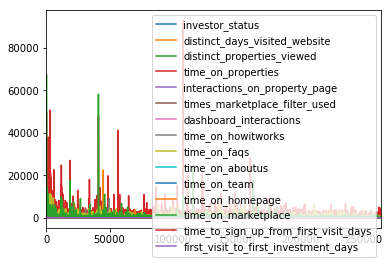

In [16]:
df.plot()

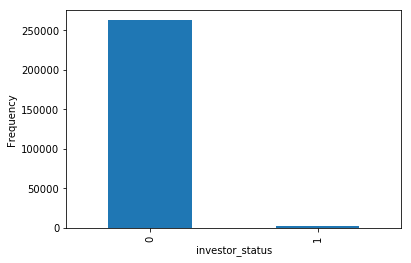

In [17]:
count_investor_status = pd.value_counts(df['investor_status'], sort = True).sort_index()
count_investor_status.plot(kind = 'bar')
plt.xlabel("investor_status")
plt.ylabel("Frequency")

In [33]:
y_train = train['investor_status']
X_train = train.drop('investor_status', axis= 1)
y_test = test['investor_status']
X_test = test.drop('investor_status', axis= 1)

In [27]:
X = df.ix[:, df.columns != 'investor_status']
y = df.ix[:, df.columns == 'investor_status']
number_records_fraud = len(df[df.investor_status == 1])
fraud_indices = np.array(df[df.investor_status == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.investor_status == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'investor_status']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'investor_status']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.investor_status == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.investor_status == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  2718


C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [68]:
yes= df[df['investor_status'] == 1]
no = df[df['investor_status'] == 0].sample(n = 1359)
print(no.shape,yes.shape)

(1359, 15) (1359, 15)


In [76]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample,test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)

(2174, 14) (2174, 1)


In [91]:
y = df['investor_status']
X = df.drop('investor_status', axis= 1)

In [92]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=50)
model  = svc.fit(X_train, y_train)

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
from sklearn.metrics import classification_report
predicted = model.predict(X)
print(classification_report(y, predicted))

             precision    recall  f1-score   support

          0       1.00      0.92      0.96    262142
          1       0.06      0.95      0.11      1359

avg / total       0.99      0.92      0.95    263501



In [94]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model2 = nb.fit(X_train, y_train)

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
predicted2 = model2.predict(X)
print(classification_report(y, predicted2))

             precision    recall  f1-score   support

          0       1.00      0.80      0.89    262142
          1       0.02      0.67      0.03      1359

avg / total       0.99      0.80      0.88    263501



In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
model3 = rfc.fit(X_train, y_train)
predicted3 = model3.predict(X)
print(classification_report(y, predicted3))

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


             precision    recall  f1-score   support

          0       1.00      0.96      0.98    262142
          1       0.11      0.99      0.20      1359

avg / total       1.00      0.96      0.98    263501

